In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('/content/breast-cancer-diagnostic.shuf.lrn.csv')
final_X_test = pd.read_csv('/content/breast-cancer-diagnostic.shuf.tes.csv')
final_Y_test = pd.read_csv('/content/breast-cancer-diagnostic.shuf.sol.ex.csv')

y_train =  pd.DataFrame( data['class'])
X_train =  pd.DataFrame( data.drop(['class' , 'ID'], axis=1))
final_X_test =  pd.DataFrame( final_X_test.drop(['ID'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)


# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
final_X_test = scaler.transform(final_X_test)

### KNN
Without PCA
With Cross-Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
param_grid = {
    'knn__n_neighbors': [5, 15, 35, 200]
}
pipe = Pipeline([('knn', knn)])
# Hier we use Grid search
grid = GridSearchCV( pipe , param_grid, cv=5)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Parameters: {'knn__n_neighbors': 15}
Best CV Score: 0.9650075414781298


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_knn__n_neighbors','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_knn__n_neighbors  mean_test_score
1                      15         0.965008
0                       5         0.961161
2                      35         0.945400
3                     200         0.660181


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.9655172413793104


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


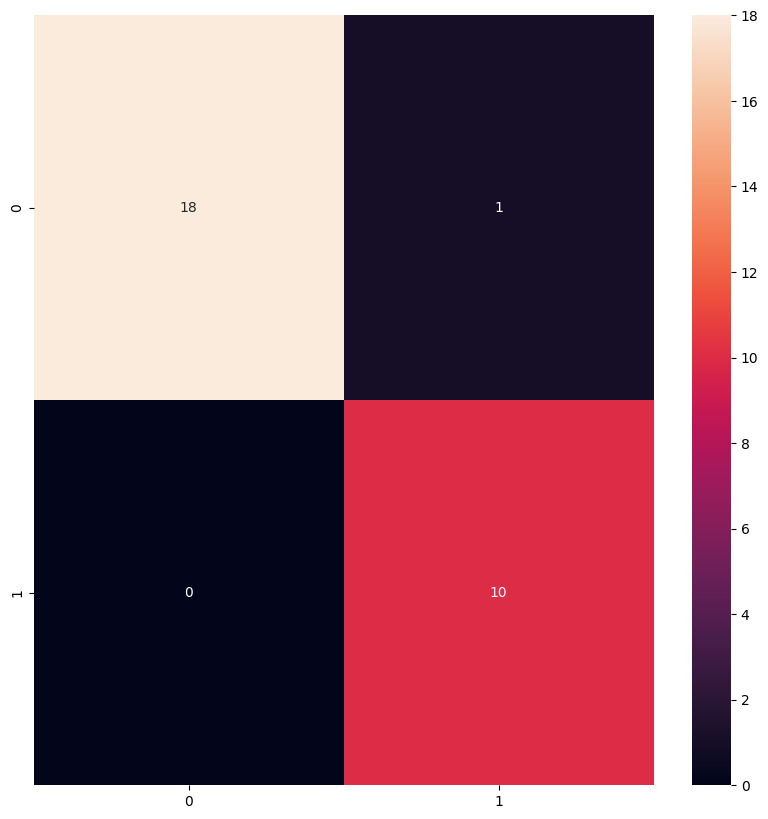

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

### Train with PCA and test on top 3
Hier we use PCA and reduce the dimention to 7 , 15 , 23.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

knn = KNeighborsClassifier()
pipe = Pipeline([
    ('pca', pca),
    ('knn', knn)])

param_grid = {
    'pca__n_components': [5 , 15 , 25],
    'knn__n_neighbors': [5, 15, 35, 200]
}
# Hier we use Grid search
grid = GridSearchCV( pipe , param_grid, cv=5)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Parameters: {'knn__n_neighbors': 15, 'pca__n_components': 15}
Best CV Score: 0.9650075414781298


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_pca__n_components','param_knn__n_neighbors','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_pca__n_components  param_knn__n_neighbors  mean_test_score
5                       25                      15         0.965008
4                       15                      15         0.965008
0                        5                       5         0.961161
1                       15                       5         0.961161
2                       25                       5         0.961161


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


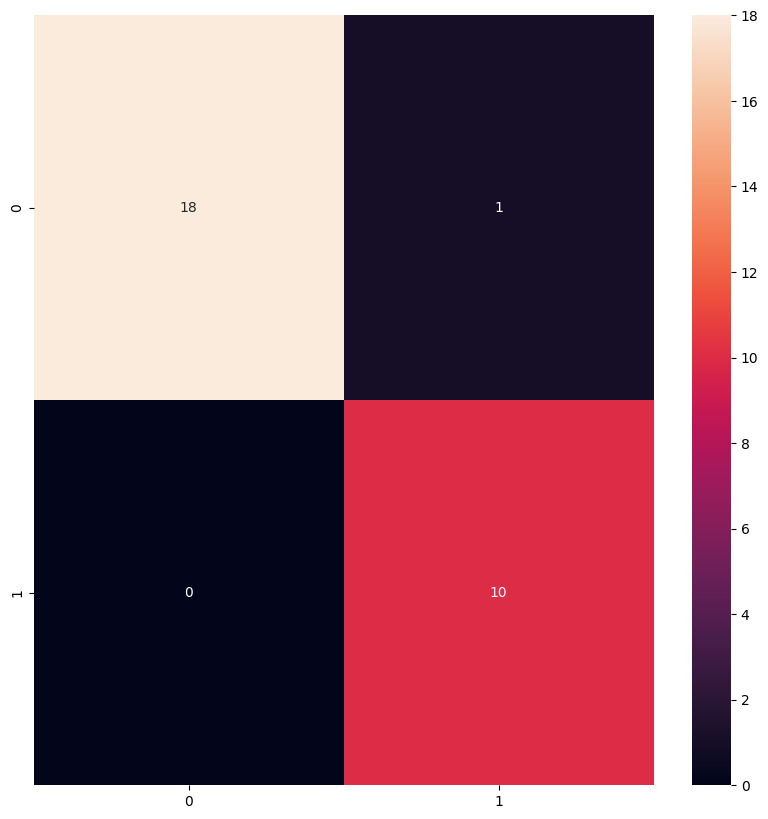

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

The Best accurace is that with 25 dimention and n of 15

In [ ]:
best_model = grid.best_estimator_
final_Y_test["class"] = best_model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)

In [ ]:
print(grid.best_estimator_)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('knn', KNeighborsClassifier(n_neighbors=15))])


### Check other settings

In [ ]:
chosen_params = results.loc[3 ,'params']
chosen_params

{'knn__n_neighbors': 15, 'pca__n_components': 5}

In [ ]:
model = Pipeline([
    ('pca', PCA(n_components=5)),
    ('knn', KNeighborsClassifier(n_neighbors=15))])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


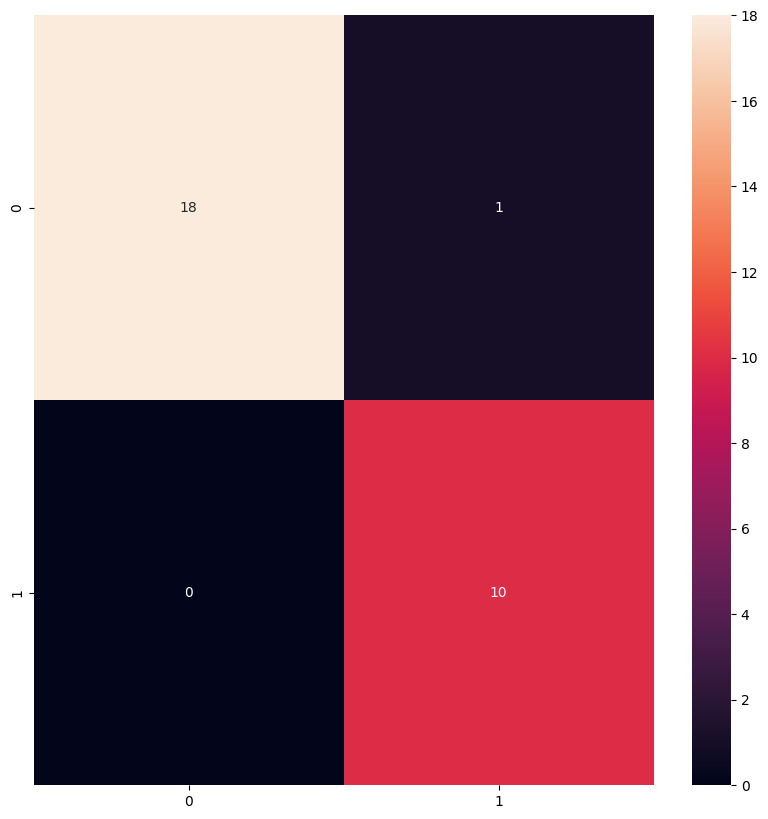

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Another Settings 2
in this section we assign the hyperparameters randomly.

In [ ]:
model = Pipeline([
    ('pca', PCA(n_components=20)),
    ('knn', KNeighborsClassifier(n_neighbors=15))])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


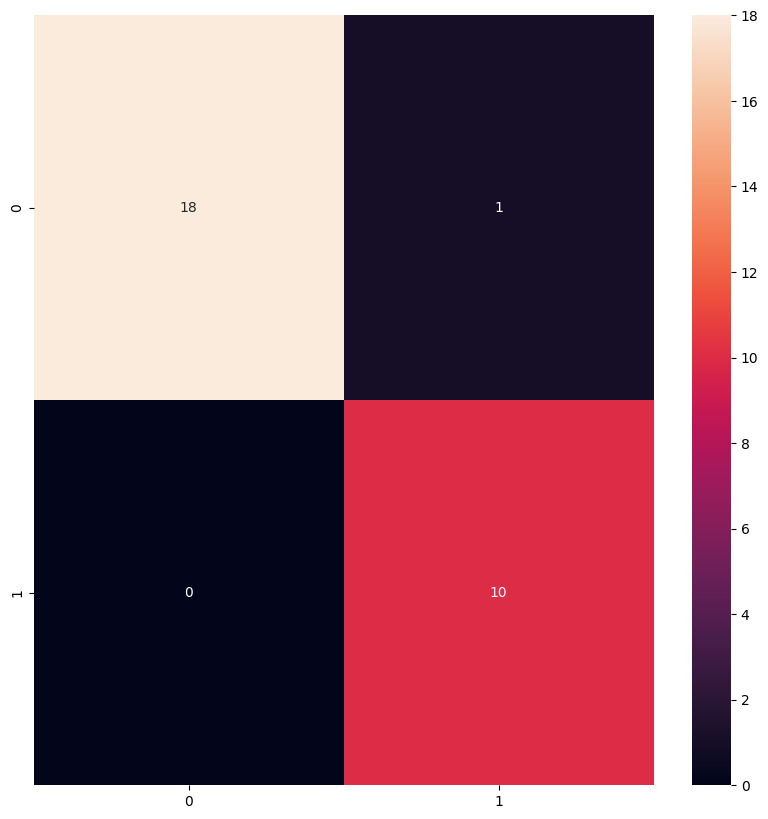

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

The Results are not changed. With KNN the results are: \\
Precision: 0.968 \\
Recall: 0.965 \\
F1 Score: 0.965

Now lets check how the best model will be, if we do not use Cross-Validation.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import PredefinedSplit


pca = PCA()

knn = KNeighborsClassifier()
pipe = Pipeline([
    ('pca', pca),
    ('knn', knn)])

test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)

param_grid = {
    'pca__n_components': [5 , 15 , 25],
    'knn__n_neighbors': [5, 15, 35, 200]
}
# Hier we use Grid search
grid = GridSearchCV( pipe , param_grid, cv=ps)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'knn__n_neighbors': 5, 'pca__n_components': 5}
Best CV Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_pca__n_components','param_knn__n_neighbors','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_pca__n_components  param_knn__n_neighbors  mean_test_score
0                        5                       5              1.0
1                       15                       5              1.0
2                       25                       5              1.0
3                        5                      15              1.0
4                       15                      15              1.0


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


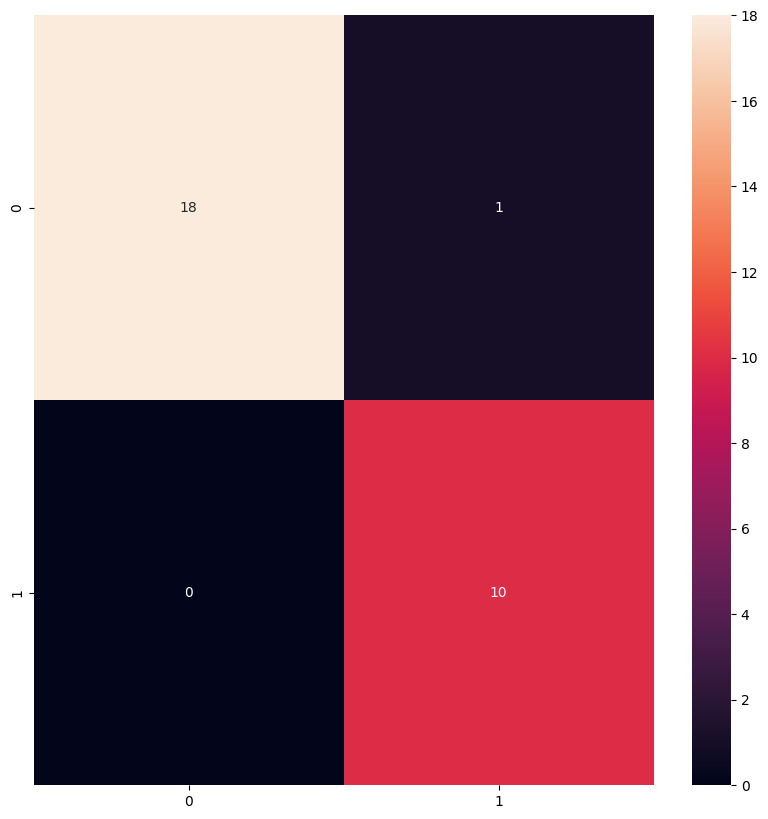

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

As you can see the order of best models is changed.
Lets check it when we don't use PCA what will happened.

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'knn__n_neighbors': [5, 15, 35, 200]
}
pipe = Pipeline([('knn', knn)])
# Hier we use Grid search
test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)
grid = GridSearchCV( pipe , param_grid, cv=ps)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'knn__n_neighbors': 5}
Best CV Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_knn__n_neighbors','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_knn__n_neighbors  mean_test_score
0                       5         1.000000
1                      15         1.000000
2                      35         0.960784
3                     200         0.647059


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


In [ ]:
final_Y_test["class"] = best_model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)

## Without Normalization


In [ ]:
pca = PCA()

knn = KNeighborsClassifier()
pipe = Pipeline([
    ('pca', pca),
    ('knn', knn)])

param_grid = {
    'pca__n_components': [5 , 15 , 25],
    'knn__n_neighbors': [5, 15, 35, 200]
}
# Hier we use Grid search
grid = GridSearchCV( pipe , param_grid, cv=5)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Parameters: {'knn__n_neighbors': 5, 'pca__n_components': 5}
Best CV Score: 0.9299396681749623


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_pca__n_components','param_knn__n_neighbors','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_pca__n_components  param_knn__n_neighbors  mean_test_score
0                        5                       5          0.92994
1                       15                       5          0.92994
2                       25                       5          0.92994
3                        5                      15          0.91448
4                       15                      15          0.91448


## Neural Network

#### Using Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)


param_grid = {

    'hidden_layer_sizes': [(5 , 5) , (5 , 10 , 5 ) , (16,16), (16,32), (16, 32 , 64), (16 , 32 , 32) ],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],

}

grid = GridSearchCV(
    mlp,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Model Accuracy: 0.9655172413793104


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


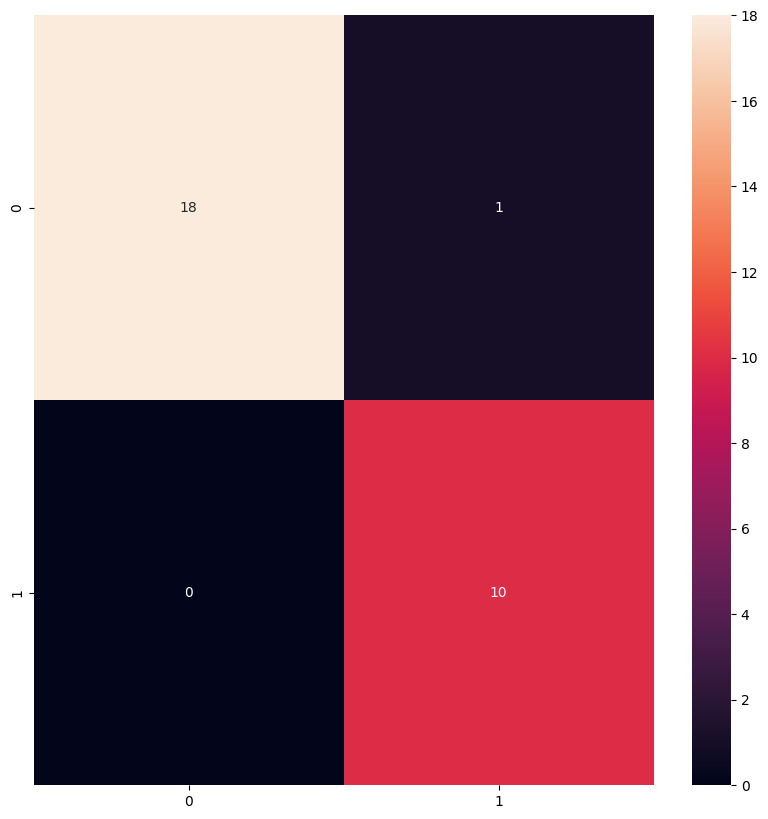

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_hidden_layer_sizes','param_activation','param_solver','param_learning_rate_init','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

In [ ]:
results_df.head()

,param_hidden_layer_sizes,param_activation,param_solver,param_learning_rate_init,mean_test_score
7,"(16, 32)",relu,adam,0.010,0.933710
11,"(16, 32, 32)",relu,adam,0.010,0.933710
10,"(16, 32, 32)",relu,adam,0.001,0.926018
1,"(5, 5)",relu,adam,0.010,0.921870
9,"(16, 32, 64)",relu,adam,0.010,0.914103


#### Other Settings 1

In [ ]:
chosen_params = results.loc[0, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (5, 5),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Another Settings 2

In [ ]:
chosen_params = results.loc[3, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (5, 10, 5),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


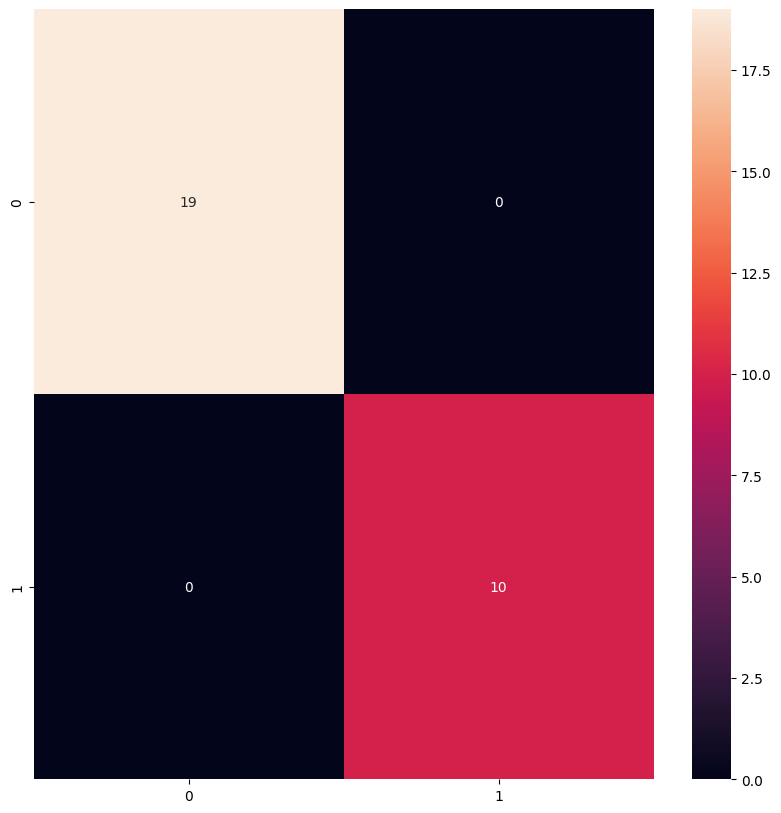

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

We also use L2 Regularization in the best model, using "alpha".

In [ ]:
model = MLPClassifier(**chosen_params , alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
final_Y_test["class"] = model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)

It works better with Regularization.

### Without Cross-Validation

In [ ]:
from sklearn.model_selection import PredefinedSplit
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)


param_grid = {

    'hidden_layer_sizes': [(5 , 5) , (5 , 10 , 5 ) , (16,16), (16,32), (16, 32 , 64), (16 , 32 , 32) ],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],

}

test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)

grid = GridSearchCV(
    mlp,
    param_grid,
    cv=ps,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Fitting 1 folds for each of 12 candidates, totalling 12 fits
Best Model Accuracy: 0.9655172413793104


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_hidden_layer_sizes','param_activation','param_solver','param_learning_rate_init','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

In [ ]:
results_df.head()

,param_hidden_layer_sizes,param_activation,param_solver,param_learning_rate_init,mean_test_score
9,"(16, 32, 64)",relu,adam,0.010,1.000000
10,"(16, 32, 32)",relu,adam,0.001,1.000000
11,"(16, 32, 32)",relu,adam,0.010,0.960784
1,"(5, 5)",relu,adam,0.010,0.941176
7,"(16, 32)",relu,adam,0.010,0.921569


In [ ]:
chosen_params = results.loc[9, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (16, 32, 64),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params , alpha = 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
final_Y_test["class"] = model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)

##### Another Settings

In [ ]:
chosen_params = results.loc[10, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (16, 32, 32),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params , alpha = 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1 Score: 0.9658722762171038


## SVM

Using Cross Validation

SVM without PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Change 'kernel' to 'svm__kernel'
    'svm__C': [1.0, 1.5, 2, 3]  # Change "c" to 'svm__C' and use uppercase 'C'
}
pipe = Pipeline([('svm', svm)])

# Hier we use Grid search
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'svm__C': 1.5, 'svm__kernel': 'rbf'}
Best CV Score: 0.9804675716440423


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


According to Grid search, the best model using rbf kernel withparam_svm__C  of 1.5. We also train the model linear kernael and param_svm__C of 1.

In [ ]:
results = pd.DataFrame(grid.cv_results_)
# Access the correct parameter columns for SVM
results_df = results[['param_svm__kernel', 'param_svm__C', 'mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
  param_svm__kernel  param_svm__C  mean_test_score
5               rbf           1.5         0.980468
9               rbf           2.0         0.980468
4            linear           1.5         0.976621
0            linear           1.0         0.976621
8            linear           2.0         0.976621


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 1.0


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


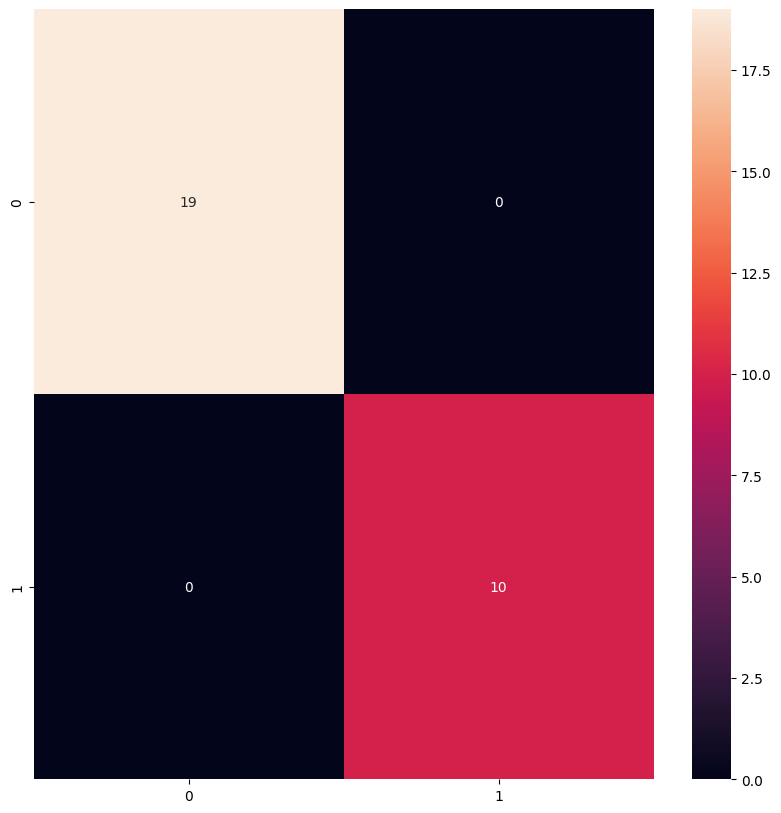

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

### Another settings 1

In [ ]:
chosen_params = results.loc[0 ,'params']
chosen_params

{'svm__C': 1.0, 'svm__kernel': 'linear'}

In [ ]:
model = SVC(kernel="linear" , C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


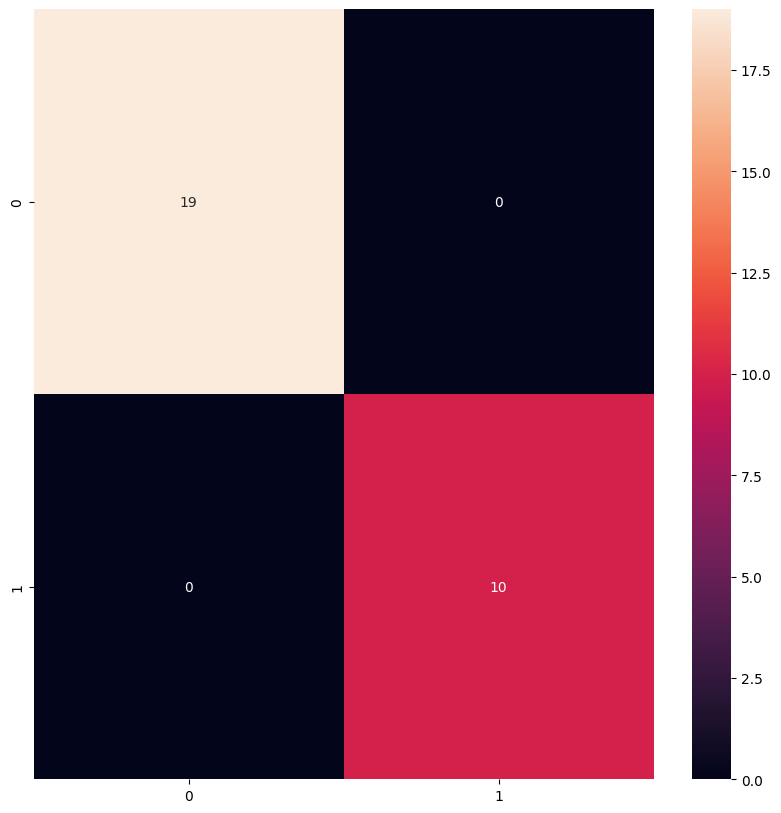

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

### In this section we use also PCA.
The results are better when we use PCA.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

svm = SVC()
pipe = Pipeline([
    ('pca', pca),
    ('svm', svm)])

param_grid = {
    'pca__n_components': [5 , 15 , 25],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__C': [1.0, 1.5, 2, 3]
    }
# Hier we use Grid search
grid = GridSearchCV( pipe , param_grid, cv=5)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
results = pd.DataFrame(grid.cv_results_)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'pca__n_components': 25, 'svm__C': 1.0, 'svm__kernel': 'linear'}
Best CV Score: 0.9844645550527904


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
results_df = results[['param_pca__n_components' , 'param_svm__kernel', 'param_svm__C', 'mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
    param_pca__n_components param_svm__kernel  param_svm__C  mean_test_score
32                       25            linear           1.0         0.984465
24                       15            linear           2.0         0.984389
16                       15            linear           1.0         0.980543
25                       15               rbf           2.0         0.980468
41                       25               rbf           2.0         0.980468


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 1.0


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


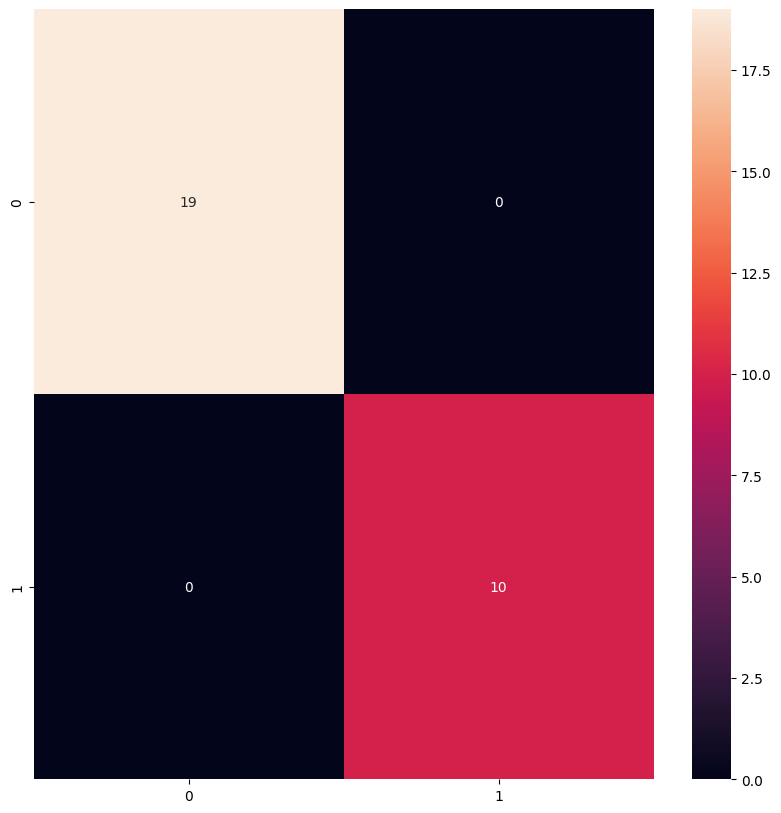

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
final_Y_test["class"] = model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)

The Best model untill now is SVM which contains linear kernael and C of 1 and also uses PCA with the component number of 25.

### Using Holdingout

Hier wie use Holdingout and grid search with and with out PCA and comapre the results with those we achieved using Cross Validation.

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import PredefinedSplit
svm = SVC()
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Change 'kernel' to 'svm__kernel'
    'svm__C': [1.0, 1.5, 2, 3]  # Change "c" to 'svm__C' and use uppercase 'C'
}

test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)

pipe = Pipeline([('svm', svm)])

# Hier we use Grid search
grid = GridSearchCV(pipe, param_grid, cv=ps)
grid.fit(X_train, y_train)

# Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
results_df = results[[ 'param_svm__kernel', 'param_svm__C', 'mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Best Parameters: {'svm__C': 1.0, 'svm__kernel': 'linear'}
Best CV Score: 1.0
Top 5 parameter combinations by mean test score:
  param_svm__kernel  param_svm__C  mean_test_score
0            linear           1.0              1.0
1               rbf           1.0              1.0
3           sigmoid           1.0              1.0
4            linear           1.5              1.0
7           sigmoid           1.5              1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import PredefinedSplit
pca = PCA()

svm = SVC()
pipe = Pipeline([
    ('pca', pca),
    ('svm', svm)])

test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)

param_grid = {
    'pca__n_components': [5 , 15 , 25],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__C': [1.0, 1.5, 2, 3]
    }
# Hier we use Grid search
grid = GridSearchCV( pipe , param_grid, cv=ps)
grid.fit(X_train, y_train)

#Get the Best Parametere
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_pca__n_components' , 'param_svm__kernel', 'param_svm__C', 'mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'pca__n_components': 5, 'svm__C': 1.0, 'svm__kernel': 'linear'}
Best CV Score: 1.0
Top 5 parameter combinations by mean test score:
   param_pca__n_components param_svm__kernel  param_svm__C  mean_test_score
0                        5            linear           1.0              1.0
1                        5               rbf           1.0              1.0
3                        5           sigmoid           1.0              1.0
4                        5            linear           1.5              1.0
7                        5           sigmoid           1.5              1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
model = grid.best_estimator_
final_Y_test["class"] = model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)